# Exercise 10: Hierarchical clustering of the grain data

In the video, you learnt that the SciPy `linkage()` function performs hierarchical clustering on an array of samples.  Use the `linkage()` function to obtain a hierarchical clustering of the grain samples, and use `dendrogram()` to visualize the result.  A sample of the grain measurements is provided in the array `samples`, while the variety of each grain sample is given by the list `varieties`.


**Step 1:** Import:

 + `linkage` and `dendrogram` from `scipy.cluster.hierarchy`.
 + `matplotlib.pyplot` as `plt`.
 + `pandas`
 + `load_iris` and `train_test_split`

In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from scipy.cluster.hierarchy import linkage, dendrogram

import matplotlib.pyplot as plt
%matplotlib inline


**Step 2:** Load the dataset _(done for you)_.

In [2]:
# refer ml1 for more information
def load_iris():
    return datasets.load_iris()

In [3]:
iris_data = load_iris()
load_iris().keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [4]:
# Create pd DF the same way you did the first day
# Create the class and target columns and remove de cm from the columns names
# refer ml1 for more information

def create_df():
  df = pd.DataFrame(iris_data.data, columns = iris_data.feature_names) 
  df.columns = [i.strip(" (cm)") for i in df.columns.tolist()]

  # iris_data['target'] or iris_data.target are same
  df['target'] = iris_data.target
  df['class'] = iris_data.target_names[iris_data.target]
  return df

create_df()

,sepal length,sepal width,petal length,petal width,target,class
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [5]:
df_iris = create_df()
df_iris.sample(n=10)

,sepal length,sepal width,petal length,petal width,target,class
24,4.8,3.4,1.9,0.2,0,setosa
27,5.2,3.5,1.5,0.2,0,setosa
54,6.5,2.8,4.6,1.5,1,versicolor
100,6.3,3.3,6.0,2.5,2,virginica
16,5.4,3.9,1.3,0.4,0,setosa
36,5.5,3.5,1.3,0.2,0,setosa
59,5.2,2.7,3.9,1.4,1,versicolor
30,4.8,3.1,1.6,0.2,0,setosa
137,6.4,3.1,5.5,1.8,2,virginica
66,5.6,3.0,4.5,1.5,1,versicolor


In [6]:
df_iris = create_df()
assert df_iris['sepal length'].shape == (150,)
assert df_iris['sepal width'].shape == (150,)
assert df_iris['petal length'].shape == (150,)
assert df_iris['petal width'].shape == (150,)
assert df_iris['target'].shape == (150,)
assert df_iris['class'].shape == (150,)

In [7]:

#From our data we will only get variable columns as np.array
x = np.array(df_iris[['sepal length', 'sepal width', 'petal length', 'petal width']])
x[:3]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2]])

In [8]:
assert x.shape == (150, 4)

**Step 3:** Perform hierarchical clustering on `samples` using the `linkage()` function with the `method='complete'` keyword argument. Assign the result to `mergings`.

In [9]:
from sklearn.preprocessing import normalize
samples = normalize(x)
samples[:3]

array([[0.80377277, 0.55160877, 0.22064351, 0.0315205 ],
       [0.82813287, 0.50702013, 0.23660939, 0.03380134],
       [0.80533308, 0.54831188, 0.2227517 , 0.03426949]])

In [10]:
mergings = linkage(samples, method = 'complete')
mergings[:3]

array([[1.01000000e+02, 1.42000000e+02, 0.00000000e+00, 2.00000000e+00],
       [1.02000000e+02, 1.11000000e+02, 1.90111713e-03, 2.00000000e+00],
       [0.00000000e+00, 1.00000000e+01, 3.27567062e-03, 2.00000000e+00]])

In [11]:
assert mergings.shape == (149, 4)

**Step 4:** Plot a dendrogram using the `dendrogram()` function on `mergings`, specifying the keyword arguments `labels=varieties`, `leaf_rotation=90`, and `leaf_font_size=6`.  Remember to call `plt.show()` afterwards, to display your plot.

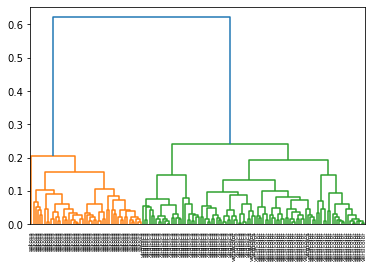

<Figure size 720x576 with 0 Axes>

In [12]:
dn = dendrogram(mergings, labels = list(df_iris['class']), leaf_rotation = 90, leaf_font_size = 6)
plt.figure(figsize = (10, 8))
plt.show()


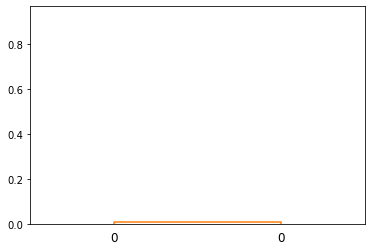

In [13]:
assert type(dn) == type(dendrogram(np.random.rand(15, 4)))

## K-MEANS

for this next part we will use the K-Means algorithm in order to cluster your data

**Step 1:** 
+ import `KMeans` from `sklearn.cluster`
+ loading our new datasets

In [14]:
from sklearn.cluster import KMeans
import pandas as pd

df = pd.read_csv('../datasets/ch1ex1.csv')
points = df.values

new_df = pd.read_csv('../datasets/ch1ex2.csv')
new_points = new_df.values


In [15]:
# inspection
print(points.shape)
df.head()

(300, 2)


,0,1
0,0.065446,-0.768664
1,-1.529015,-0.429531
2,1.709934,0.698853
3,1.167791,1.012626
4,-1.801101,-0.318613


**Step 2:** Using `KMeans()`, create a `KMeans` instance called `model` to find `3` clusters. To specify the number of clusters, use the `n_clusters` keyword argument


In [16]:
# to get the corect cluster we use this
ks = range(1, 6)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)

    # Fit model to samples
    model.fit(points)

    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)

C:\Users\ritth\software\anaconda\envs\strive\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


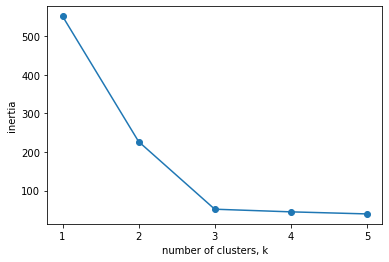

In [17]:
# plot the cluster
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [18]:
# number of cluster touches 3th point
# So we know that 3 represents number of cluster we want
model = KMeans(n_clusters = 3)

In [19]:
assert type(model)== type(KMeans())

**Step 4:** Use the `.fit()` method of `model` to fit the model to the array of points `points`.

In [20]:
model.fit(points)

KMeans(n_clusters=3)

**Step 5:** Use the `.predict()` method of `model` to predict the cluster labels of `points`, assigning the result to `labels`.

In [21]:
labels = model.predict(points)
labels

array([2, 1, 0, 0, 1, 1, 0, 2, 1, 1, 0, 2, 1, 0, 1, 2, 0, 0, 2, 0, 1, 2,
       1, 2, 2, 1, 2, 2, 2, 1, 0, 0, 0, 1, 2, 1, 2, 2, 1, 2, 2, 0, 1, 1,
       1, 2, 2, 0, 2, 0, 0, 0, 2, 2, 2, 1, 2, 2, 1, 0, 1, 2, 2, 0, 0, 1,
       0, 1, 1, 2, 0, 1, 0, 2, 0, 1, 2, 2, 2, 0, 2, 1, 0, 1, 1, 1, 1, 2,
       2, 0, 1, 0, 1, 2, 2, 2, 0, 1, 1, 0, 1, 2, 1, 0, 2, 0, 0, 0, 1, 1,
       2, 1, 0, 1, 1, 1, 2, 1, 0, 0, 2, 2, 2, 2, 2, 1, 0, 2, 1, 1, 0, 0,
       1, 2, 1, 2, 0, 1, 0, 2, 0, 0, 2, 0, 0, 2, 0, 1, 2, 2, 2, 0, 0, 1,
       0, 1, 2, 2, 0, 1, 0, 0, 0, 1, 2, 2, 1, 0, 0, 2, 2, 0, 2, 2, 1, 2,
       0, 0, 0, 2, 2, 0, 2, 0, 0, 2, 1, 0, 2, 2, 2, 2, 1, 0, 2, 1, 1, 1,
       2, 1, 2, 2, 1, 0, 0, 2, 0, 2, 2, 1, 1, 2, 0, 1, 0, 2, 0, 1, 2, 1,
       1, 1, 1, 0, 0, 0, 2, 2, 1, 2, 0, 1, 2, 2, 1, 2, 0, 0, 0, 0, 0, 1,
       2, 2, 0, 0, 2, 1, 0, 1, 1, 2, 2, 1, 1, 1, 2, 0, 2, 1, 2, 0, 0, 0,
       0, 0, 2, 2, 1, 2, 2, 1, 0, 0, 1, 2, 0, 0, 1, 1, 2, 2, 2, 1, 1, 2,
       0, 1, 1, 0, 2, 2, 2, 1, 2, 2, 2, 1, 1, 1])

In [22]:
assert labels[labels.argmax()] == 2
assert labels.shape == (300,)

In [23]:
# Make a function that returns 3 numpy arrays each one with the points associated for each class
#If the label is 0 they go into data_0
#If the label is 1 they go into data_1
#If the label is 2 they go into data_2

def separate_labels(labels, points):
    data_0 = []
    data_1 = []
    data_2 = []

    for lab, pt in zip(labels, points):
        if lab == 0:
            data_0.append(pt)
        elif lab == 1:
            data_1.append(pt)
        else:
            data_2.append(pt)
        
    return np.array(data_0), np.array(data_1), np.array(data_2)


data_0,data_1,data_2 =separate_labels(labels, points)

print(data_0.shape)
print(data_1.shape)
print(data_2.shape)

(94, 2)
(95, 2)
(111, 2)


In [24]:
assert abs(data_0.shape[0] - 94) <= 20
assert abs(data_1.shape[0] - 95) <= 20
assert abs(data_2.shape[0] - 111) <= 20

## Another Method

In [25]:
# another method

def separate_labels(labels, points):
    data_0 = []
    data_1 = []
    data_2 = []
    
    for index in range(points.shape[0]):
        if labels[index] == 0:
            data_0.append(points[index])
        elif labels[index]== 1:
            data_1.append(points[index])
        elif labels[index] == 2:
            data_2.append(points[index])

   
    return np.array(data_0),np.array(data_1),np.array(data_2)


data_0,data_1,data_2 =separate_labels(labels, points)

print(data_0.shape)
print(data_1.shape)
print(data_2.shape)


(94, 2)
(95, 2)
(111, 2)


In [26]:
assert abs(data_0.shape[0] - 94) <= 20
assert abs(data_1.shape[0] - 95) <= 20
assert abs(data_2.shape[0] - 111) <= 20

## Checking and Plotting the data

In [27]:
# First column is x, so it  is 0
# Second column is y, so it is 1
data_0[:3]

array([[1.70993371, 0.69885253],
       [1.16779145, 1.01262638],
       [1.21990375, 0.74643463]])

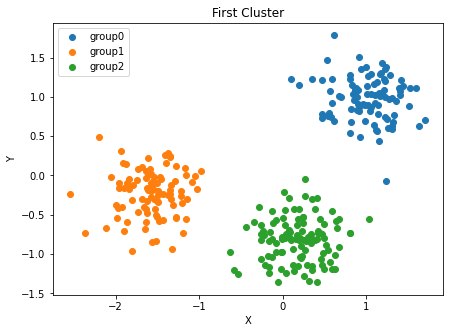

In [28]:
# plotting the data 
data = [data_0, data_1, data_2]
label_name = 0
label_name1 = 1
label_name2 = 2

plt.figure(figsize =(7, 5))
plt.scatter(data_0[:, 0], data_0[:, 1], label = f'group{label_name}')
plt.scatter(data_1[:, 0], data_1[:, 1], label = f'group{label_name1}')
plt.scatter(data_2[:, 0], data_2[:, 1], label = f'group{label_name2}')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('First Cluster')
plt.legend()
plt.show()

## Another Method with for loop for Plotting

In [29]:
pd.Series(labels)

0      2
1      1
2      0
3      0
4      1
      ..
295    2
296    2
297    1
298    1
299    1
Length: 300, dtype: int32

In [30]:
# this used to get [0, 1, 2] in label
pd.Series(labels).value_counts()

2    111
1     95
0     94
dtype: int64

In [31]:
pd.Series(labels).value_counts().index

Int64Index([2, 1, 0], dtype='int64')

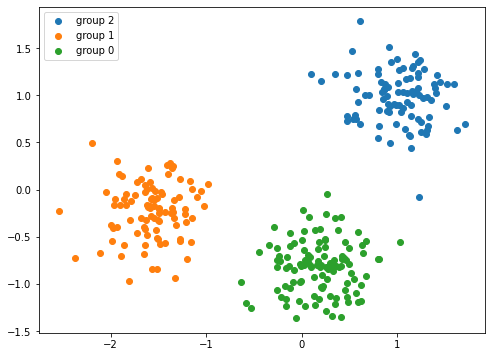

In [32]:
# plotting the data 
label = pd.Series(labels).value_counts().index
data = [data_0, data_1, data_2]

plt.figure(figsize=(8, 6))

for lab, dt in zip(label, data):
    plt.scatter(dt[:, 0], dt[:, 1], label = f'group {lab}')

plt.legend()

## Repeating the same method for new_points

**Step 7:** Use the `.predict()` method of `model` to predict the cluster labels of `new_points`, assigning the result to `new_labels`.  Notice that KMeans can assign previously unseen points to the clusters it has already found!

In [33]:
# points and new_points have the same cluster as 3
# so we are not checking the KMeans and .fit
new_labels = model.predict(new_points)
new_labels[:3]

array([0, 0, 1])

In [34]:
assert new_labels[new_labels.argmax()] == 2
assert new_labels.shape == (100,)

In [35]:
#separate the data by labels like we did before

def separate_labels(new_labels, new_points):
    new_0 = []
    new_1 = []
    new_2 = []

    for lab, pt in zip(new_labels, new_points):
        if lab == 0:
            new_0.append(pt)
        elif lab == 1:
            new_1.append(pt)
        elif lab == 2:
            new_2.append(pt)
        
    return np.array(new_0), np.array(new_1), np.array(new_2)


new_0, new_1, new_2 = separate_labels(new_labels, new_points)

print(new_0.shape)
print(new_1.shape)
print(new_2.shape)

(34, 2)
(34, 2)
(32, 2)


In [36]:
assert abs(new_0.shape[0] - 34) <= 5
assert abs(new_1.shape[0] - 34) <= 5
assert abs(new_2.shape[0] - 34) <= 5

In [37]:
new_0[:3]

array([[0.89676469, 1.14312679],
       [0.97385117, 0.92917238],
       [1.27755934, 1.37949406]])

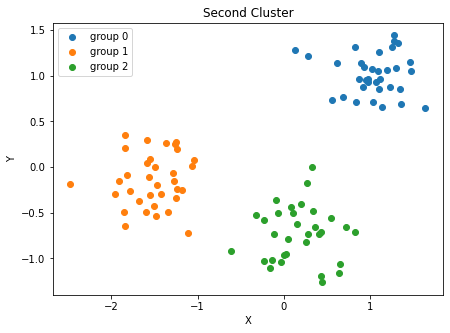

In [38]:
# plot the new labels
 
new = [new_0, new_1, new_2]
label_name = 0
label_name1 = 1
label_name2 = 2

plt.figure(figsize =(7, 5))
plt.scatter(new_0[:, 0], new_0[:, 1], label = f'group {label_name}')
plt.scatter(new_1[:, 0], new_1[:, 1], label = f'group {label_name1}')
plt.scatter(new_2[:, 0], new_2[:, 1], label = f'group {label_name2}')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Second Cluster')
plt.legend()
plt.show()

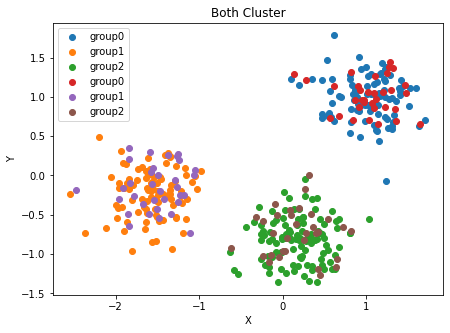

In [39]:
# plot all the points together

label_name = 0
label_name1 = 1
label_name2 = 2
new_label_name3 = 0
new_label_name4 = 1
new_label_name5 = 2

plt.figure(figsize =(7, 5))
plt.scatter(data_0[:, 0], data_0[:, 1], label = f'group{label_name}')
plt.scatter(data_1[:, 0], data_1[:, 1], label = f'group{label_name1}')
plt.scatter(data_2[:, 0], data_2[:, 1], label = f'group{label_name2}')

plt.scatter(new_0[:, 0], new_0[:, 1], label = f'group{new_label_name3}')
plt.scatter(new_1[:, 0], new_1[:, 1], label = f'group{new_label_name4}')
plt.scatter(new_2[:, 0], new_2[:, 1], label = f'group{new_label_name5}')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Both Cluster')
plt.legend()
plt.show()

# Another Method with Seaborn

In [40]:
#plot all the points together
# we tried both DataFrame methods here 
# we can use anything

#df[['label', 'point_type']] = labels, 'training_data'
df = pd .DataFrame({'label':labels, 'point_type':'training_data'})

# #new_df[['label', 'point_type']] = new_labels, 'new_data'
new_df = pd .DataFrame({'label':labels, 'point_type':'new_data'})

all_points = pd.concat([df, new_df])
all_points[:3]

,label,point_type
0,2,training_data
1,1,training_data
2,0,training_data


In [41]:
print(df.shape)

(300, 2)


In [42]:
#plot all the points together

df[['label', 'point_type']] = labels, 'training_data'
new_df[['label', 'point_type']] = new_labels, 'new_data'

all_points = pd.concat([df, new_df])


C:\Users\ritth\software\anaconda\envs\strive\lib\site-packages\numpy\core\fromnumeric.py:3199: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).ndim


ValueError: Length of values (100) does not match length of index (300)

In [ ]:
# checking column name
all_points.columns

Index(['label', 'point_type'], dtype='object')

<AxesSubplot:xlabel='label', ylabel='point_type'>

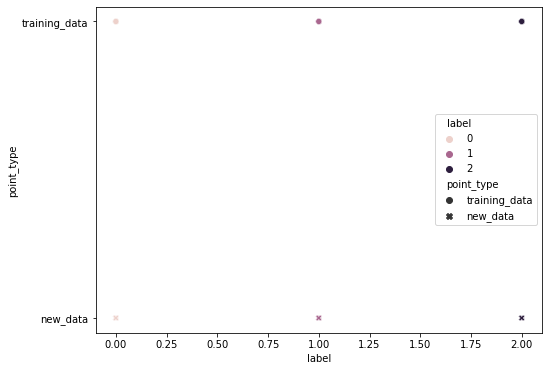

In [ ]:
import seaborn as sns

# we are using 0 for 
plt.figure(figsize=(8, 6))
sns.scatterplot(
                x = all_points['0'], 
                y = all_points['1'], 
                hue = all_points['label'],
                style = all_points['point_type']
                )